This is the cretin main file where all the functionality is available. To use this file succesfully you must have added your paths to the paths.py file and you must have cretin installed which is coupled too via the demo.sh.
I will the showcase the full functionality in this file  

In [2]:
from importlib import reload
import generator_object, to_generator_string, search, paths, write_run_plot, serial_sim_tools, import_plt_file #these python classes should be in the same folder as cretin_main
for obj in [generator_object, to_generator_string, search, paths, write_run_plot, serial_sim_tools, import_plt_file]:
    reload(obj)

import numpy as np

In [3]:
# These are all the functions inside the generator object class
gen_object = [i for i in dir(generator_object.User_input()) if i[0:2] != '__']
print(gen_object)

# all the function inside the to_generator file 
gen_to_file = [i for i in dir(to_generator_string.Text_generator(generator_object.User_input())) if i[0:2] != '__']
print(gen_to_file)

['atoms', 'controls', 'geometry', 'geometry_nodes', 'geometry_product_mesh', 'geometry_quad', 'materials_atom', 'materials_atom_modeltype', 'materials_region', 'materials_region_background', 'materials_region_element', 'materials_region_level', 'materials_region_material', 'materials_region_opacity', 'materials_region_rho', 'other_switches', 'pop_paramters', 'popular_switches', 'radiation_angles', 'radiation_aprd', 'radiation_ebins', 'radiation_lbins', 'radiation_line', 'radiation_spectrum', 'regions', 'source_boundary', 'source_jbndry', 'source_jnu', 'source_laser', 'source_rswitch', 'sources', 'sources_aprd']
['controls', 'dict', 'execute', 'flat', 'geometry', 'ilts', 'materials', 'pop_switches', 'radiation', 'sources', 'start_chapter', 'user_input']


In [4]:
# This allows us to find frequntly used terms in the generator files, 
# To be specific the lines of text in the generator files get sliced on " " and then selected by the input, f.e 'alias'
# Then a histogram gets made of the most common results
# similarly for most used words in a chapter (ie "Radiation", "Geography" etc)

search_for_word = 'laser'
search_inside_chapter = 'Controls'
df = search.Generators().word(input = search_for_word, word_slicing = (0,10), print_path = False)
print(df.to_string())
print(search.Generators().chapter(input = search_inside_chapter))


                                          0
laser 1 4x rate history 1 1.              4
laser 1 1x value history 1 1. ! 1w laser  1
               0
geometry      61
rlin          51
quad          10
rgeom          6
rlog           5
ylog           4
xlog           4
scale          4
product_mesh   4
xgeom          4
#endif         4
#ifdef         4
hex            3
scalekl        3
ylin           2
zlin           1
u3d            1
scaleklm       1
cone           1
velocity       1
wedge          1
u2d            1


In [5]:
# reproducing detecterz.gen
gen1 = generator_object.User_input()

k1, k2 = 1, 21
l1, l2 = 1, 11
n2 = (k2*l2)/2 
NI, NE, TE = 10**20, 10**20, 10**3
R0, R1, Z0, Z1  = 0. , 1., -5, 5
RD, ZD = R1 + .1, Z1 +.1
MU1 = 10**-3
MU2 = -1 + MU1
PHI1, PHI2, PHI3 = 1.57, .785, .524

gen1.materials_region(nodes = [k1, k2, l1, l2], elec_temp = 1.1)
gen1.materials_region_background(k1, k2, l1, l2, TE)
gen1.geometry(type = 'rz')
gen1.geometry_quad(node_1 = [k1, k2], node_2= [l1, l2], x_cors = [R0, R1], y_cors = [Z0, Z1], ratios = [1,1])
gen1.radiation_ebins(n_boundaries = 50, start = 100, end = 1000)
gen1.radiation_angles(n_rays=3, n_angles= 15)
gen1.controls(t_start=0, t_end=0)
gen1.popular_switches(continuum_transfer='do steady-state continuum transfer',include_degeneracy='include electron degeneracy')

write_run_plot.all(name = 'trial1', object = gen1, longprint= False, plot_duplicates= False)




writing too /home/brewster/Desktop/cretin.v2_19_test/test/trial1/trial1.gen
running cretin with trial1
plotting trial1 too /home/brewster/Desktop/cretin.v2_19_test/test/trial1/images
emis_0 has dimension 3 and has not been
jnu_0 has dimension 3 and has not been
kappa_0 has dimension 3 and has not been
plots trial1 finished at location /home/brewster/Desktop/cretin.v2_19_test/test/trial1/images


In [6]:
# Here we reproduce lasfoam.gen from the test folder

gen2 = generator_object.User_input()

N0, N1 = 1, 21 #number of nodes is 20
DN, DR = 10, .1
E1, E2 = 4.68, 4.69
TE, rho = 2.0, 0.003
HPEV = 4.134*10**(-15) #planck in (eV sec)
MULT = HPEV/(E2-E1)

gen2.materials_atom(index = 1, quantum_n_max = 3, element= "h")
gen2.materials_atom(index = 2, quantum_n_max = 3, element= "c")
gen2.materials_region(nodes = [N0, N1], elec_temp = TE)
gen2.materials_region_rho(rho)
gen2.materials_region_element(index = 1, initial_ion_population = 1)
gen2.materials_region_element(index = 2, initial_ion_population = 1)

gen2.geometry(type = 'slab')
gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

gen2.radiation_ebins(n_boundaries = 61, start = 0.1, end = 10**(5))
gen2.radiation_angles(n_rays = 3)

gen2.source_laser(laser_wavelength = 4, option_1= 'rate', option_2= 'history', laser_intensities = [1,1], nodes= [N0, N1])
#gen2.source_jnu(E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes= [N0, N1])
#gen2.source_jbndry(index = 1, E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes = [1,1], values=[1,2])

gen2.popular_switches(timestep_between_snapshot = 5)

gen2.controls(t_start=0., t_end=3*10**-9, restart = True)

# this automatically creates the 'trial' folder, writes too the 'trial.gen' file, runs cretin, extracts the data and plots it into the trial/images folder 
write_run_plot.all(name = 'trial', object = gen2, longprint = False, plot_duplicates = False)


writing too /home/brewster/Desktop/cretin.v2_19_test/test/trial/trial.gen
running cretin with trial
plotting trial too /home/brewster/Desktop/cretin.v2_19_test/test/trial/images
plots trial finished at location /home/brewster/Desktop/cretin.v2_19_test/test/trial/images



writing too /home/brewster/Desktop/cretin.v2_19_test/test/serial1/serial1.gen
running cretin with serial1
plotting serial1 too /home/brewster/Desktop/cretin.v2_19_test/test/serial1/images
plots serial1 finished at location /home/brewster/Desktop/cretin.v2_19_test/test/serial1/images

writing too /home/brewster/Desktop/cretin.v2_19_test/test/serial2/serial2.gen
running cretin with serial2
plotting serial2 too /home/brewster/Desktop/cretin.v2_19_test/test/serial2/images
plots serial2 finished at location /home/brewster/Desktop/cretin.v2_19_test/test/serial2/images
comparison of serial1 and serial2, number of identical arrays: 115 number of changed arrays: 0 number of comparision errors: 1

writing too /home/brewster/Desktop/cretin.v2_19_test/test/serial3/serial3.gen
running cretin with serial3
plotting serial3 too /home/brewster/Desktop/cretin.v2_19_test/test/serial3/images
plots serial3 finished at location /home/brewster/Desktop/cretin.v2_19_test/test/serial3/images
comparison of seri

KeyboardInterrupt: 

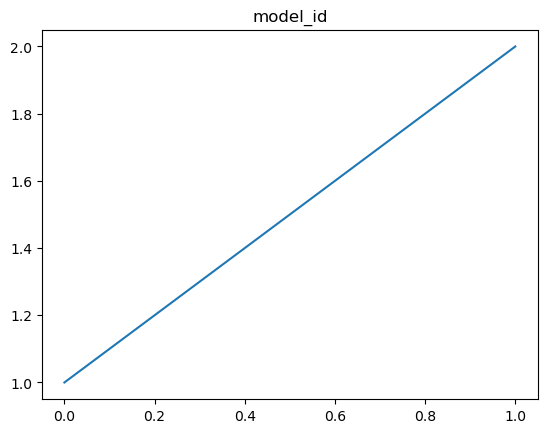

In [7]:
# by turning lasfoam into a function we can introduce a variable and do simulations in series using the serial_sim_tools
def lasfoam(variable):

    gen2 = generator_object.User_input()

    N0, N1 = 1, 21 #number of nodes is 20
    DN, DR = 10, .1
    E1, E2 = 4.68, 4.69
    TE, rho = 2.0, 0.003
    HPEV = 4.134*10**(-15) #planck in (eV sec)
    MULT = HPEV/(E2-E1)

    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "h")
    gen2.materials_atom(index = 2, quantum_n_max = 3, element= "c")
    gen2.materials_region(nodes = [N0, N1], elec_temp = TE)
    gen2.materials_region_rho(rho)
    gen2.materials_region_element(index = 1, initial_ion_population = 1)
    gen2.materials_region_element(index = 2, initial_ion_population = 1)

    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 61, start = 0.1, end = 10**(5))
    gen2.radiation_angles(n_rays = 3)

    gen2.source_laser(laser_wavelength = variable, option_1= 'rate', option_2= 'history', laser_intensities = [1,1], nodes= [N0, N1])
    #gen2.source_jnu(E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes= [N0, N1])
    #gen2.source_jbndry(index = 1, E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes = [1,1], values=[1,2])

    gen2.popular_switches(timestep_between_snapshot = 5)

    gen2.controls(t_start=0., t_end=3*10**-9, restart = True)
    return gen2

name = 'serial'
i0, iend = 1,10
for i in range(i0,iend):
    variable = 10**(-i)

    # adding our variable to the simulation
    gen2 = lasfoam(variable)
    write_run_plot.all(name = name+str(i), object = gen2, longprint = False, plot_duplicates = False)
    if i > i0:
        org_trial, curr_trial = f'{name}{str(i0)}',f'{name}{str(i)}'

        # comparing data from the data dump for diffrent simulations with dependancy on 'variable'
        compare_dict = serial_sim_tools.check_dependancy(org_trial, curr_trial)
        val_lis = list(compare_dict.values())
        print(f'comparison of {org_trial} and {curr_trial}, number of identical arrays: {val_lis.count(True)} number of changed arrays: {val_lis.count(False)} number of comparision errors: {val_lis.count("comparison error")}')

In [ ]:
# here we plot mutiple simulations into one plot to compare them


# first we create our generic object
def sim(var):

    gen2 = generator_object.User_input()

    rho, T_ev, Tkelvin = 6.9, 30*var, 512,  
    ne, z = 10**20, 12
    N0, N1 = 1, 41 #We are operating in 1d wih 40 nodes
    tin_n = 50
    E1, E2 = 4, 4.7 # the laser energies
    DN, DR = 10, .1


    gen2.materials_atom(index = 1, quantum_n_max = 5, element= "Sn")
    gen2.materials_region(nodes = [N0, N1], elec_temp = T_ev)
    gen2.materials_region_rho(rho)
    gen2.materials_region_background(ion_density = ne, electron_density = ne, average_charge = z, average_charge_squared=z**2, avg_atomic_number = tin_n )
    gen2.materials_region_element(index = 1, initial_ion_population = ne )

    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 121, start = 10**-5, end = 10**(5))
    gen2.radiation_angles(n_rays = 3)

    gen2.controls(t_start=0., t_end=3*10**-6, restart = True)
    gen2.popular_switches(timestep_between_snapshot = 5)
    #gen2.source_laser(laser_wavelength = 4, option_1= 'rate', option_2= 'history', laser_intensities = [1,1], nodes= [N0, N1])
    #gen2.source_jnu(E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes= [N0, var])
    #gen2.source_jbndry(index = 1, E_range=[E1,E2], option_1= 'rate', option_2= 'history', nodes = [1,1], values=[1,2])

    return gen2


i0, iend = 0,6
trials = []
name = 'trial'
for i in range(i0,iend):

    trial = name+str(i)
    trials.append(trial)
    variable = 2**i
    gen2 = sim(variable)
    write_run_plot.write(name = name+str(i), object = gen2)
    write_run_plot.run(name = name+str(i), longprint=False)

serial_sim_tools.plot_all('trials_mutiplot', trials)


NameError: name 'generator_object' is not defined